Hi, I'm still learning and currently just copying the tutorial of : https://www.kaggle.com/code/edumisvieramartin/satellite-image-classif-99-accuracy/notebook

In [5]:
import torch  
import numpy as np
import pandas as pd 
import tensorflow as tf
import torch.nn as nn
import matplotlib.pyplot as plt

In [29]:
layers = tf.keras.layers
Sequential = tf.keras.Sequential
Conv2D = tf.keras.layers.Conv2D
MaxPool2D = tf.keras.layers.MaxPool2D
Flatten = tf.keras.layers.Flatten
Dense = tf.keras.layers.Dense
Rescaling = tf.keras.layers.Rescaling
Input = tf.keras.layers.Input



In [15]:
import kagglehub
path = kagglehub.dataset_download("mahmoudreda55/satellite-image-classification")
print("Path to dataset files:", path)



import os
# Check what's in the kagglehub download directory
print(os.listdir(path))

updated_path = os.path.join(path, "data")
if os.path.exists(updated_path):
    print(os.listdir(updated_path))
    # Update your path variable
    path = updated_path



Path to dataset files: /Users/vitosteiner/.cache/kagglehub/datasets/mahmoudreda55/satellite-image-classification/versions/1
['data']
['cloudy', 'water', 'green_area', 'desert']


In [16]:
bath_size = 32
height = 72
width = 128

## split inot training and validation set
train = tf.keras.utils.image_dataset_from_directory(path, validation_split=0.2, subset="training", seed=1234, image_size=(height, width), batch_size=bath_size)

val = tf.keras.utils.image_dataset_from_directory(path, validation_split=0.2, subset="validation", seed=1234, image_size=(height, width), batch_size=bath_size)

Found 5631 files belonging to 4 classes.
Using 4505 files for training.
Found 5631 files belonging to 4 classes.
Using 1126 files for validation.


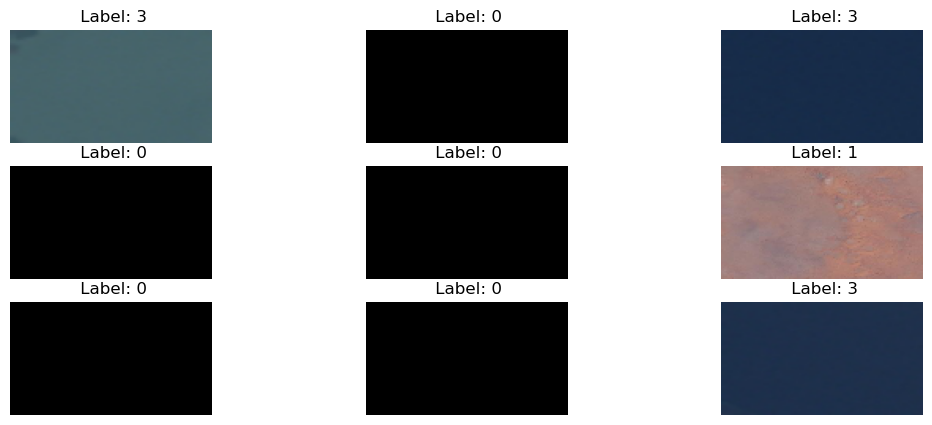

In [17]:
## printing some first images 
plt.figure(figsize=(13, 5))


## training set
for i, (iamges,lables) in enumerate(train.take(1)):
    for j in range(9):
        ax = plt.subplot(3, 3, j + 1)
        plt.imshow(iamges[j].numpy().astype("uint8"))
        plt.title(F" Label: {int(lables[j])}")
        plt.axis("off")
plt.show()



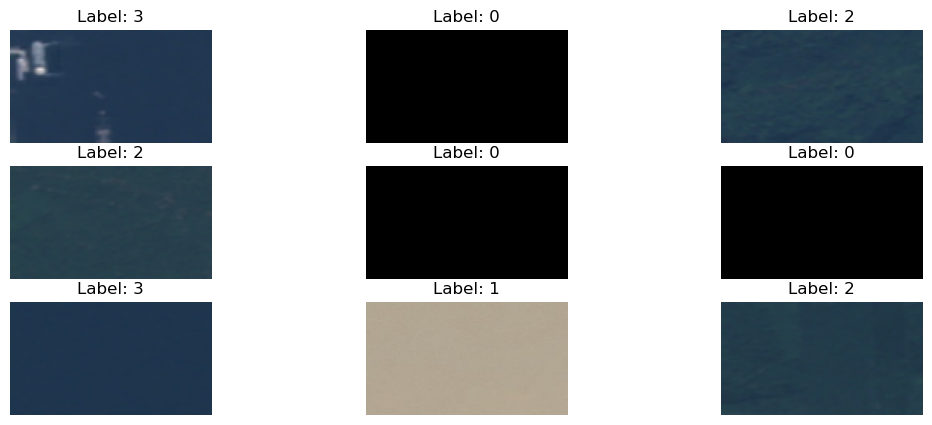

In [19]:
## validation set
plt.figure(figsize=(13, 5))
for i, (images, labels) in enumerate(val.take(1)):
    for j in range(9):
        ax = plt.subplot(3, 3, j + 1)
        plt.imshow(images[j].numpy().astype("uint8"))
        plt.title(f"Label: {labels[j].numpy()}")
        plt.axis("off")
plt.show()

In [25]:
amount = len(set(label for _, labels in train for label in labels.numpy()))
print(f"There are {amount} different Classes")

In [20]:
classes = {
    0 : "cloudy", 
    1 : "desert", 
    2: "water", 
    3: "green_area"
}

In [ ]:
## CNN model architecture
model = Sequential([
    Input(shape=(height, width, 3)),
    Rescaling(1./255),
    Conv2D(16, 3, activation="relu", padding="same"),
    MaxPool2D(),
    Conv2D(32, 3, activation="relu", padding="same"),
    MaxPool2D(),
    Conv2D(64, 3, activation="relu", padding="same"),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(amount, activation="softmax")
])


In [31]:
model.compile(optimizer="adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [33]:
epochs = 20
history = model.fit(train, validation_data = val, epochs=epochs)


Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.9117 - loss: 0.1957 - val_accuracy: 0.8828 - val_loss: 0.2372
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.9227 - loss: 0.1791 - val_accuracy: 0.9147 - val_loss: 0.1788
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.9453 - loss: 0.1317 - val_accuracy: 0.9263 - val_loss: 0.1896
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.9440 - loss: 0.1299 - val_accuracy: 0.9636 - val_loss: 0.0925
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.9493 - loss: 0.1156 - val_accuracy: 0.9130 - val_loss: 0.1871
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.9687 - loss: 0.0741 - val_accuracy: 0.9689 - val_loss: 0.0702
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.9789 - loss: 0.0474 - val_accuracy: 0.9734 - val_loss: 0.0734
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.9861 - loss: 0.0370 - val_accu

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 72, 128, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 72, 128, 16)    │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 36, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 36, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 18, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 16, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,611,630 (13.78 MB)

 Trainable params: 1,203,876 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,407,754 (9.18 MB)

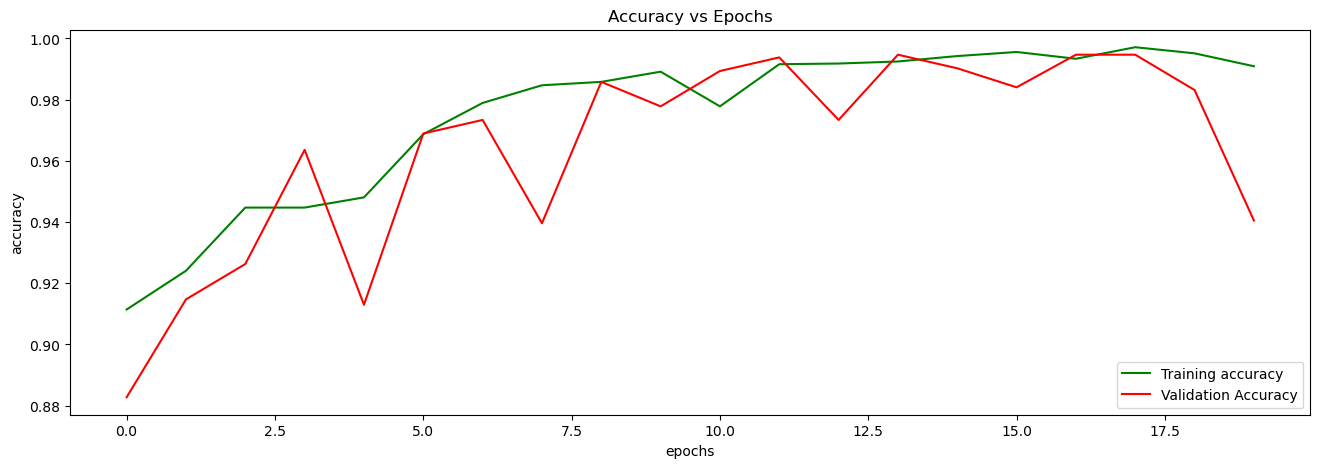

In [39]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(16,5 ))
plt.plot(epochs_range, accuracy, label = 'Training accuracy', color='green')
plt.plot(epochs_range, val_accuracy, label= 'Validation Accuracy', color= 'red')
plt.legend(loc = 'lower right')
plt.title('Accuracy vs Epochs')
plt.ylabel('accuracy') 
plt.xlabel('epochs')
plt.show()

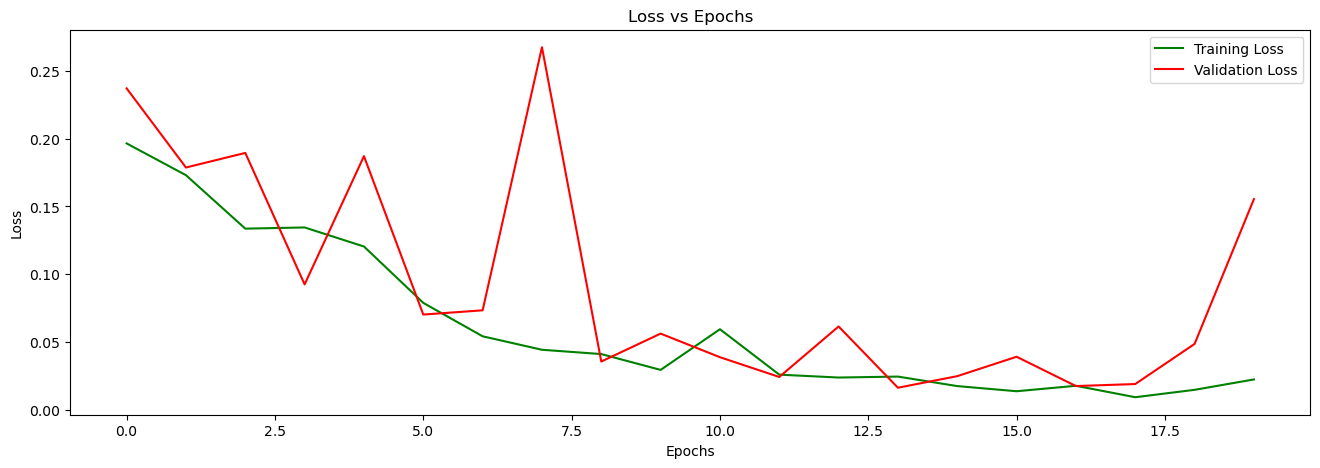

In [40]:
plt.figure(figsize=(16, 5))
plt.plot(epochs_range, loss, label='Training Loss', color='green')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='red')
plt.legend(loc='upper right')
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()